# Assignment 1 - Exploratory Data Analysis

In this Jupiter Notebook we will be exploring data from activity trackers ([DDL Assignment 1](https://learn.hu.nl/mod/book/view.php?id=42352&chapterid=3880)). 
We will explore quantitative variables and its interaction with multiple variables, both quantitative and qualitative. We start by importing the necessary libraries we will be working with to process and visualize data.

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import math

### Initial data cleaning and merging
Inserting the two .csv files below, seperating the steps file by the __';'__ delimeter as the data was seperated that way.
The survey file was using a comma for seperation, and as it's the default for opening csv's with pandas we don't need to tell pandas.

In [2]:
steps = pd.read_csv("Assignment 1 - steps data.csv", delimiter=";")
survey = pd.read_csv("Assignment 1 - survey data.csv")

Below, we merge the two files on the column both files have in common: the (user) ID. To check if the data correctly merged, we look at the first few and last results.

In [3]:
steps_survey = pd.merge(survey,steps, on="id")
steps_survey.head(3)

,id,city,gender,age,hh_size,hh_type,education,height,weight,waist,...,4-5-2014,5-5-2014,6-5-2014,7-5-2014,8-5-2014,9-5-2014,10-5-2014,11-5-2014,12-5-2014,13-5-2014
0,1,Montpellier,male,25-34,2,couple,master or doctorate,183.0,62.0,78.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,Montpellier,female,25-34,2,couple,high school,163.0,60.0,75.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,Lyon,female,25-34,2,couple,master or doctorate,172.0,65.0,60.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
steps_survey.tail(3)

,id,city,gender,age,hh_size,hh_type,education,height,weight,waist,...,4-5-2014,5-5-2014,6-5-2014,7-5-2014,8-5-2014,9-5-2014,10-5-2014,11-5-2014,12-5-2014,13-5-2014
926,927,Lyon,female,45-54,3,family,primary,169.0,108.0,108.0,...,NaN,NaN,NaN,NaN,14977.0,12778.0,12511.0,NaN,NaN,NaN
927,928,Montpellier,female,35-44,1,single,master or doctorate,167.0,64.0,85.0,...,13101.0,8812.0,3821.0,3817.0,4092.0,15096.0,6024.0,4035.0,NaN,NaN
928,929,Lille,male,25-34,2,couple,bachelor,190.0,83.0,89.0,...,8227.0,12369.0,8710.0,15514.0,7435.0,4978.0,14123.0,15799.0,7121.0,NaN


Looks good! To get the mean steps of all days we calculate it with .mean() function. Pandas automatically ignores all NaN values while calculating the mean this way (the parameter is automatically set up this way), which means we don't have to drop these values in order to calculate this.  

Let's also take a look if the means are correctly calculated!

In [5]:
steps_mean = steps.mean()
steps_mean.head(5)

id             465.000000
20-6-2013     2253.454545
21-6-2013     8968.935065
22-6-2013    10412.117424
23-6-2013     7631.215548
dtype: float64

In [6]:
steps_mean.tail(5)

9-5-2014     10236.531250
10-5-2014    10668.343137
11-5-2014     8982.021053
12-5-2014     8287.642857
13-5-2014             NaN
dtype: float64

The first row takes the mean of the ID's, which are irrelevant for our analysis, as they are no steps value. 
We can see the last column has no value. To check if any other row has no values (to calculate a mean), we calculate the total amount of empty columns. 

In [7]:
sum(steps_mean.isnull())

1

It looks like only our last column has no data, so we can exclude that one as well. 

In [8]:
total_columns = len(steps_mean) -1 
total_rows = steps["id"].count() - 2
steps_mean_df = steps_mean.iloc[1:total_columns]

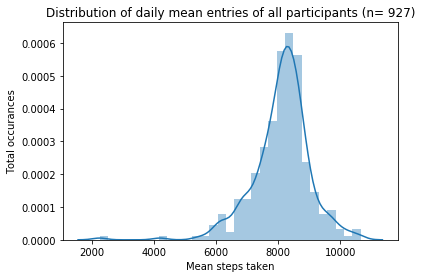

In [9]:
sns.distplot(steps_mean_df)
plt.title(f'Distribution of daily mean entries of all participants (n= {total_rows})')
plt.ylabel('Total occurances')
plt.xlabel('Mean steps taken')
plt.show()

Overall, it seems like the distribution of all the mean steps is normally distributed and left-tailed.
However, looking at the dataset, since there are a lot of missing values, it seems like most people only reported their walking activity (amount of steps) on days where they actively walked. 

## Plotting time series - Mean steps per day over all participants

<function matplotlib.pyplot.show(*args, **kw)>

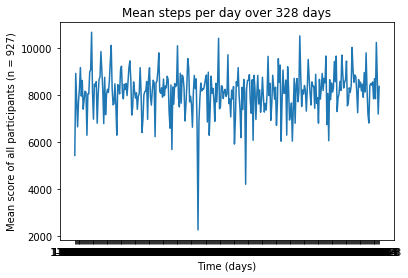

In [10]:
sns.lineplot(data = steps_mean_df)
plt.title(f"Mean steps per day over {total_columns} days") 
plt.xlabel("Time (days)")
plt.ylabel(f"Mean score of all participants (n = {total_rows})")
plt.show

There are a few very big outliers, lets check what date this outlier is so we might get an explanation. 

In [11]:
lowest_steps_mean_df = steps_mean_df[steps_mean_df < 3000]
lowest_steps_mean_df

20-6-2013    2253.454545
dtype: float64

Hmm... Just a weird day with a very low mean. Couldn't find any explanations online for events on this day! Let's exclude it...

<function matplotlib.pyplot.show(*args, **kw)>

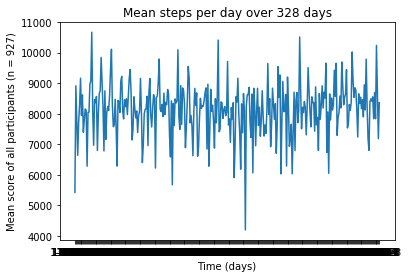

In [12]:
clean_steps_mean_df = steps_mean_df[steps_mean_df > 3000]
sns.lineplot(data = clean_steps_mean_df)
plt.title(f"Mean steps per day over {total_columns} days") 
plt.xlabel("Time (days)")
plt.ylabel(f"Mean score of all participants (n = {total_rows})")
plt.show

## Analysing (the distribution of) one quantitative variable
Now we're gonna take a look at the distribution of some quantitative variables. We will be looking at the distribution of waist size. To get a quick look at which values are occuring (and if they are reasonable), we quickly plot the data with pandas. We also sort the data by waist size and look at the most extreme low and high values, so we can make a good decision where to draw the line for extreme values (if these appear).

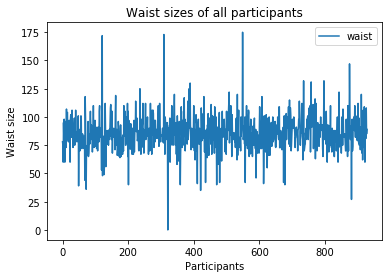

In [13]:
# Plotting waist sizes
waist_plot = steps_survey.plot(y="waist")
plt.title("Waist sizes of all participants")
plt.ylabel("Waist size")
plt.xlabel("Participants")
plt.show()

In [14]:
# Checking lowest values
lowest_values = steps_survey.sort_values(by="waist",ascending=True)
lowest_values.head(8)

,id,city,gender,age,hh_size,hh_type,education,height,weight,waist,...,4-5-2014,5-5-2014,6-5-2014,7-5-2014,8-5-2014,9-5-2014,10-5-2014,11-5-2014,12-5-2014,13-5-2014
321,322,Lille,male,<25,1,single,master or doctorate,178.0,83.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
881,882,Lille,female,45-54,2,couple,master or doctorate,168.0,55.0,27.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
421,422,Lyon,female,45-54,4,family,master or doctorate,160.0,50.0,35.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
72,73,Lille,female,25-34,1,single,master or doctorate,170.0,52.0,36.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
49,50,Lyon,female,35-44,4,family,bachelor,172.0,78.0,39.0,...,4122.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
678,679,Lyon,male,25-34,2,couple,bachelor,181.0,74.0,40.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
470,471,Lille,male,<25,2,couple,master or doctorate,185.0,74.0,40.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
359,360,Bordeaux,male,25-34,2,couple,bachelor,186.0,73.0,40.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [15]:
highest_values = steps_survey.sort_values(by="waist",ascending=False)
highest_values.head(8)

,id,city,gender,age,hh_size,hh_type,education,height,weight,waist,...,4-5-2014,5-5-2014,6-5-2014,7-5-2014,8-5-2014,9-5-2014,10-5-2014,11-5-2014,12-5-2014,13-5-2014
549,550,Lyon,female,<25,1,other,master or doctorate,164.0,59.0,175.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
309,310,Bordeaux,female,25-34,2,couple,master or doctorate,157.0,59.0,173.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
121,122,Bordeaux,male,<25,1,single,master or doctorate,172.0,72.0,172.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
875,876,Lyon,male,45-54,4,family,master or doctorate,195.0,155.0,147.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
735,736,Lyon,female,35-44,3,family,bachelor,167.0,140.0,132.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
797,798,Lyon,male,45-54,2,couple,high school,185.0,140.0,132.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
758,759,Lyon,male,25-34,1,single,master or doctorate,186.0,128.0,131.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
389,390,Montpellier,male,45-54,2,other,master or doctorate,183.0,149.0,130.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


It looks like we have some extreme values which are not plausible. Waist sizes of lower than 45 and higher than 130 seem very unlikely [(On Average, n.d.)](https://www.onaverage.co.uk/body-averages/average-waist-size). We will make a new column in the dataframe where the corrected values are displayed in, replacing extreme values with NaN so we can ignore them later, to make more realistic distributions.

In [16]:
def remove_extremes(x):
    if(x > 130.0): 
        return float('NaN')
    if(x < 45.0): 
        return float('NaN')
    else: 
        return x

# Creating the waist_corrected row
steps_survey['waist_corrected'] = steps_survey['waist'].apply(remove_extremes)
column_WC = steps_survey["waist_corrected"]

# Putting the waist_corrected column next to the waist column
steps_survey.insert(steps_survey.columns.get_loc('waist') + 1, "waist_corrected1", column_WC)
steps_survey.pop("waist_corrected")
steps_survey.rename(columns={'waist_corrected1': 'waist_corrected'}, inplace=True)

Before we visualize the distribution of waist size over all participants, we calculate descriptive (summary) statistics first to inplement in our plots.

In [17]:
# Subsetting the dataframe, dropping the NaN variables and calculating descriptive statistics
df_waist_corrected = steps_survey['waist_corrected'].dropna()
waist_descriptive_statistics = df_waist_corrected.describe()
print(waist_descriptive_statistics)

count    905.000000
mean      86.148066
std       12.799948
min       46.000000
25%       77.000000
50%       85.000000
75%       94.000000
max      130.000000
Name: waist_corrected, dtype: float64


The .describe() function doesn't give us variance and the median. Both are calculated below.
The standard deviation is the square root of the variance, so we have to calculate the square of the standard deviaton to get the variance. 

In [18]:
# Standard deviation is square root of variance, so we have to calculate the square of the standard deviaton to get the variance. 
waist_variance = waist_descriptive_statistics[2] * waist_descriptive_statistics[2] 
waist_median = df_waist_corrected.median()
waist_mode = df_waist_corrected.mode()

print(f"Variance: {waist_variance}")
print(f"Median: {waist_median}")

Variance: 163.83867158851976
Median: 85.0


### Visualizing the distribution of one quantitative variable
#### Density plot

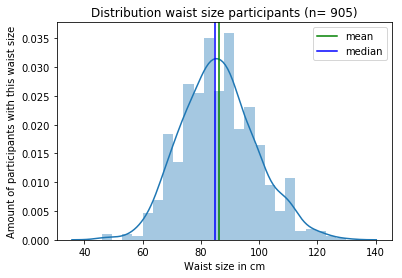

In [19]:
# Plotting a Histogram with density plot
total_participants = len(df_waist_corrected)
sns.distplot(df_waist_corrected, kde=True) 
plt.title(f'Distribution waist size participants (n= {total_participants})')
plt.xlabel("Waist size in cm")
plt.ylabel("Amount of participants with this waist size")
plt.axvline(waist_descriptive_statistics[1], 0, 100, color='green', label='mean')
plt.axvline(waist_median, 0, 100, color='blue', label='median')
plt.legend() 
plt.show()

#### Box plot

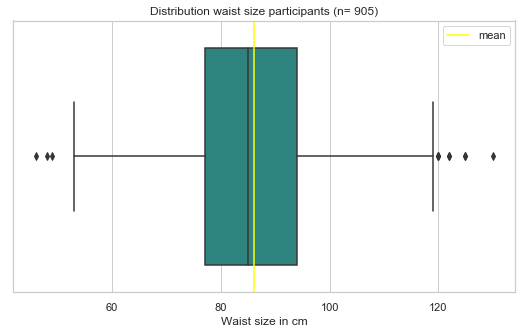

In [20]:
# Showing distribution of waist size in boxplot
sns.set(style="whitegrid")
plt.figure(figsize=(9,5))
sns.boxplot(df_waist_corrected, palette="viridis")
plt.title(f'Distribution waist size participants (n= {total_participants})')
plt.axvline(waist_descriptive_statistics[1], 0, 100, color='yellow', label='mean')
plt.xlabel("Waist size in cm")
plt.legend()
plt.show()

#### Violin plot

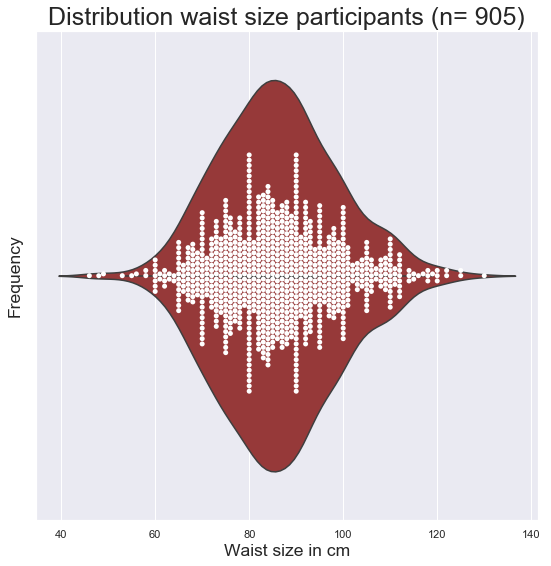

In [21]:
plt.figure(figsize=(9,9))
sns.set(style="darkgrid")
sns.violinplot(df_waist_corrected, color="brown")
sns.swarmplot(df_waist_corrected, color='white')
plt.title(f'Distribution waist size participants (n= {total_participants})', fontsize=25)
plt.ylabel('Frequency', fontsize=17.5)
plt.xlabel('Waist size in cm', fontsize=17.5)
plt.show()

Overall, the waist size is clealry normally distributed, with two peaks at 80-95cm.
Both sides have outliers (left 3, right 4), however there is no clear skewness or tail to be found (very little right skewed).


## Relation / Correlation
Lets see if there are any quantitative variables which correlate with each other. We will be looking at the relation of mean steps per participant with weight and height. To do this, we have to calculate the mean steps per person first and create a new dataframe based off that (merging it with survey data). We will also leave out empty values, which we leave out by using _dropna()_. Like before, we will leave out the first and last column in our calculation. 

In [99]:
steps_perperson = steps.loc[:,'20-6-2013':'12-5-2014']
steps_perperson['mean'] = steps_perperson.mean(axis=1)
steps_survey["mean_steps"] = steps_perperson["mean"]
steps_survey.head(3)

,id,city,gender,age,hh_size,hh_type,education,height,weight,waist,...,5-5-2014,6-5-2014,7-5-2014,8-5-2014,9-5-2014,10-5-2014,11-5-2014,12-5-2014,13-5-2014,mean_steps
0,1,Montpellier,male,25-34,2,couple,master or doctorate,183.0,62.0,78.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6757.911765
1,2,Montpellier,female,25-34,2,couple,high school,163.0,60.0,75.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3403.964706
2,3,Lyon,female,25-34,2,couple,master or doctorate,172.0,65.0,60.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4986.550505


In [109]:
height_weight_steps = steps_survey[["height","weight","mean_steps"]]
df_HWS = height_weight_steps.dropna()

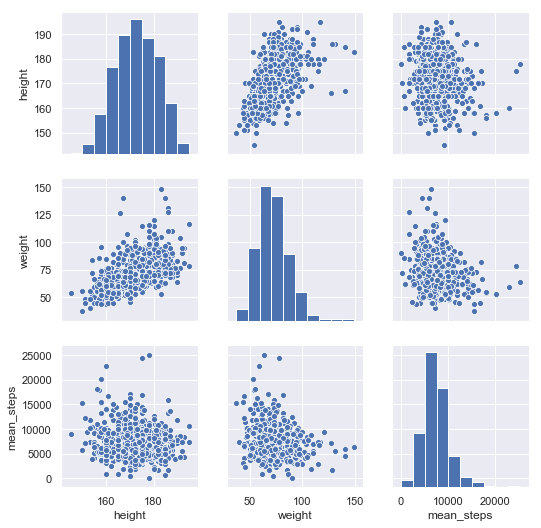

In [114]:
sns.pairplot(df_HWS)
plt.show()

In [ ]:
#sns.lmplot(x='subscribers_m', y='views_m', fit_reg=False, data=df) #fit_reg=False leaves out the regression line; see below
